**Annual Average Residential Water Use (Municipal)**

**Table**: env_dep_reviewed_water_demand_m

**Source**: Massachusetts Department of Environmental Protection (MassDEP)Universe: Residential Gallons per Capita Day

**Description**: Average Annual Water Demand from Public Water Suppliers that have been reviewed by MassDEP. Residential Gallons per Capita Day is the average number of gallons used per resident per day over the calendar year. Massachusetts state standard = 65 gal/capita/day. Blank values indicates that there was insufficient data to calculate a value. Reasons include: system not 100% metered; master meter malfunction; or seasonal population issues.

https://datacommon.mapc.org/browser/datasets/260


**Data Columns Dictionary**

muni_id   - Municipal ID
municipal - Municipality
pwsid     - Public Water Supply ID    
pws_name  - Public Water Supply Name
rgpcd2009 - Residential Gallons per Capita Day in 2009
rgpcd2010 - Residential Gallons per Capita Day in 2010
rgpcd2011 - Residential Gallons per Capita Day in 2011
rgpcd2012 - Residential Gallons per Capita Day in 2012
rgpcd2013 - Residential Gallons per Capita Day in 2013
rgpcd2014 - Residential Gallons per Capita Day in 2014
rgpcd2015 - Residential Gallons per Capita Day in 2015

# **Data Loading**

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load municipal water use dataset
path = r"/content/annual_average_residential_water_use(municipal).csv"
df = pd.read_csv(path)


In [4]:
#Understanding the dataset
df.head()

,muni_id,municipal,pwsid,pws_name,rgpcd2009,rgpcd2010,rgpcd2011,rgpcd2012,rgpcd2013,rgpcd2014,rgpcd2015
0,1.0,Abington,4001000.0,ABINGTON & ROCKLAND JT WATER WORKS,61.0,64.0,62.0,68.0,59.0,64.0,63.0
1,2.0,Acton,2002000.0,ACTON WATER DISTRICT,55.0,55.0,56.0,55.0,56.0,54.0,60.0
2,3.0,Acushnet,4003000.0,ACUSHNET WATER DEPARTMENT,53.0,72.0,70.0,NaN,60.0,52.0,50.0
3,4.0,Adams,1004000.0,ADAMS FIRE DISTRICT,56.0,55.0,73.0,59.0,55.0,54.0,56.0
4,5.0,Agawam,1005000.0,AGAWAM WATER DEPARTMENT,60.0,78.0,75.0,75.0,75.0,66.0,70.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   muni_id    284 non-null    float64
 1   municipal  284 non-null    object 
 2   pwsid      284 non-null    float64
 3   pws_name   284 non-null    object 
 4   rgpcd2009  253 non-null    float64
 5   rgpcd2010  255 non-null    float64
 6   rgpcd2011  255 non-null    float64
 7   rgpcd2012  242 non-null    float64
 8   rgpcd2013  249 non-null    float64
 9   rgpcd2014  254 non-null    float64
 10  rgpcd2015  261 non-null    float64
dtypes: float64(9), object(2)
memory usage: 24.8+ KB


In [39]:
df['municipal'].count()

287

# **Data Cleaning**

Data cleaning stage entails checking the missing values for ease analysis and visualization.
We will either fill with the mean of the specified column (if quantitative values)or drop altogether

In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
muni_id       3
municipal     3
pwsid         3
pws_name      3
rgpcd2009    34
rgpcd2010    32
rgpcd2011    32
rgpcd2012    45
rgpcd2013    38
rgpcd2014    33
rgpcd2015    26
dtype: int64


**Handling Missing Categorical Values**

In [7]:
#Handling Missing Categorical Data ['Municipality', 'Public Water Supply Name']

#Filling for Categorical
categorical_columns = ['municipal', 'pws_name']
# Fill in the missing values with 'Unknown'
df[categorical_columns] = df[categorical_columns].fillna("Unknown")

# Change 'municipal' and 'pws_name' to camel case
df['municipal'] = df['municipal'].str.title()
df['pws_name'] = df['pws_name'].str.title()

In [8]:
# Verify that the missing values have been filled
missing_values_after = df[categorical_columns].isnull().sum()
print("\nMissing values after filling with 'Unknown':")
print(missing_values_after)


Missing values after filling with 'Unknown':
municipal    0
pws_name     0
dtype: int64


**Handling Missing Numerical Values**

Mean Imputation: Replacing missing values with the mean of the column. This is  can distort the distribution if the data has outliers.

Median Imputation: Using the median is often a better choice than the mean, especially if the data is skewed. The median is less affected by outliers.

In [9]:
# Fill in the missing values using median imputation
# List of numerical columns to impute
numerical_columns = ['rgpcd2009', 'rgpcd2010', 'rgpcd2011', 'rgpcd2012', 'rgpcd2013', 'rgpcd2014', 'rgpcd2015']
# Impute missing values with the median
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

In [10]:
#Handling Missing Numerical Data ['Municipal ID', 'Public Water Supply ID']

#Filling for Numerical
id_columns = ['muni_id', 'pwsid']
# Replace numeric values with a specific integer(0)
df[id_columns] = df[id_columns].fillna(0)

# Convert 'muni_id' and 'pwsid' to integers (without decimals)
df['muni_id'] = df['muni_id'].astype(int)
df['pwsid'] = df['pwsid'].astype(int)

In [11]:
# Verify that the missing values have been filled
missing_values_after = df[numerical_columns].isnull().sum()
print("\nMissing values after median imputation:")
print(missing_values_after)


Missing values after median imputation:
rgpcd2009    0
rgpcd2010    0
rgpcd2011    0
rgpcd2012    0
rgpcd2013    0
rgpcd2014    0
rgpcd2015    0
dtype: int64


In [12]:
df.head()

,muni_id,municipal,pwsid,pws_name,rgpcd2009,rgpcd2010,rgpcd2011,rgpcd2012,rgpcd2013,rgpcd2014,rgpcd2015
0,1,Abington,4001000,Abington & Rockland Jt Water Works,61.0,64.0,62.0,68.0,59.0,64.0,63.0
1,2,Acton,2002000,Acton Water District,55.0,55.0,56.0,55.0,56.0,54.0,60.0
2,3,Acushnet,4003000,Acushnet Water Department,53.0,72.0,70.0,57.0,60.0,52.0,50.0
3,4,Adams,1004000,Adams Fire District,56.0,55.0,73.0,59.0,55.0,54.0,56.0
4,5,Agawam,1005000,Agawam Water Department,60.0,78.0,75.0,75.0,75.0,66.0,70.0


# **Data Analysis using Descriptive Statistics**

In [13]:
# Get descriptive statistics for all numerical columns
df.describe()

,muni_id,pwsid,rgpcd2009,rgpcd2010,rgpcd2011,rgpcd2012,rgpcd2013,rgpcd2014,rgpcd2015
count,287.000000,2.870000e+02,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,173.303136,2.802555e+06,57.421603,60.679443,57.672822,57.965157,57.177700,56.595819,58.372822
std,102.530647,1.104724e+06,10.089458,11.652082,10.545686,11.480243,11.040285,11.921233,13.116358
min,0.000000,0.000000e+00,24.000000,23.000000,24.000000,22.000000,29.000000,29.000000,25.000000
25%,84.500000,2.099000e+06,52.000000,54.000000,52.000000,52.000000,52.000000,50.000000,51.000000
50%,173.000000,3.073000e+06,57.000000,60.000000,56.000000,57.000000,56.000000,55.000000,57.000000
75%,263.000000,4.020002e+06,61.000000,65.000000,62.000000,62.000000,61.000000,61.000000,63.000000
max,351.000000,4.351000e+06,96.000000,109.000000,100.000000,119.000000,113.000000,113.000000,127.000000


**Skewness** : measures the asymmetry of the distribution of data points around the mean. It indicates whether the data is skewed to the left (negative skew) or to the right (positive skew).

**Kurtosis** : measures the "tailedness" of the distribution. It indicates how heavy or light the tails of the distribution are compared to a normal distribution.

**Range** : is the difference between the maximum and minimum values in a dataset. It provides a simple measure of variability.

In [14]:
# Specify the columns for analysis
columns = ['rgpcd2009', 'rgpcd2010', 'rgpcd2011', 'rgpcd2012', 'rgpcd2013', 'rgpcd2014', 'rgpcd2015']

# Initialize a list to store the results
summary_stats = []

# Calculate the summary statistics for each year
for col in columns:
    skewness = df[col].skew()
    kurtosis = df[col].kurt()
    data_range = df[col].max() - df[col].min()

    # Append results to the list
    summary_stats.append({
        'Year': col[-4:],  # Extracting the year from the column name
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'Range': data_range
    })

# Create a DataFrame from the summary statistics
summary_df = pd.DataFrame(summary_stats)

# Display the summary statistics DataFrame
print("Summary Statistics from 2009 to 2015:")
summary_df


Summary Statistics from 2009 to 2015:


,Year,Skewness,Kurtosis,Range
0,2009,0.589686,1.967029,72.0
1,2010,1.018202,2.639282,86.0
2,2011,0.750911,2.337538,76.0
3,2012,1.513220,5.677169,97.0
4,2013,1.399925,4.337829,84.0
5,2014,1.404606,4.202961,84.0
6,2015,1.713229,5.980910,102.0


**Outlier Detection**

In [15]:
columns = ['rgpcd2009', 'rgpcd2010', 'rgpcd2011', 'rgpcd2012', 'rgpcd2013', 'rgpcd2014', 'rgpcd2015']

# Initialize a list to store the results
outlier_stats = []

# Calculate IQR and outliers for each year
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    total_outliers = outliers.shape[0]

    # Append results to the list
    outlier_stats.append({
        'Year': col[-4:],  # Extracting the year from the column name
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Total Outliers': total_outliers
    })

# Create a DataFrame from the outlier statistics
outlier_df = pd.DataFrame(outlier_stats)

# Display the outlier statistics DataFrame
print("Outlier Statistics from 2009 to 2015:")
outlier_df

Outlier Statistics from 2009 to 2015:


,Year,IQR,Lower Bound,Upper Bound,Total Outliers
0,2009,9.0,38.5,74.5,22
1,2010,11.0,37.5,81.5,19
2,2011,10.0,37.0,77.0,17
3,2012,10.0,37.0,77.0,21
4,2013,9.0,38.5,74.5,25
5,2014,11.0,33.5,77.5,16
6,2015,12.0,33.0,81.0,12


# **Data Manipulation**

**Data Wrangling**

Reshaping the data using melt() to convert the dataset from a wide format to a long format. This allows us to have one column for the year and another for the corresponding water usage values.

We'll add:
A Year column to simplify the analysis.

An Above_Benchmark column to indicate if the water usage exceeds the state standard of 65 gallons per capita per day.

In [16]:
# Step 1: Reshaping Data using melt
# Assume the first four columns are identifiers and the rest are years
id_vars = ['muni_id', 'municipal', 'pwsid', 'pws_name']
value_vars = ['rgpcd2009', 'rgpcd2010', 'rgpcd2011', 'rgpcd2012', 'rgpcd2013', 'rgpcd2014', 'rgpcd2015']


In [17]:
# Melt the DataFrame
melted_df = pd.melt(df, id_vars=id_vars, value_vars=value_vars,
                     var_name='Year', value_name='Water_Usage')

In [18]:
# Creating New Columns
# Extract the year from the 'Year' column
melted_df['Year'] = melted_df['Year'].str.extract('(\d+)').astype(int)

In [19]:
# Create the Above_Benchmark column
melted_df['Above_Benchmark'] = melted_df['Water_Usage'] > 65

In [44]:
# Display the transformed DataFrame
melted_df.head(2000)

,muni_id,municipal,pwsid,pws_name,Year,Water_Usage,Above_Benchmark
0,1,Abington,4001000,Abington & Rockland Jt Water Works,2009,61.0,False
1,2,Acton,2002000,Acton Water District,2009,55.0,False
2,3,Acushnet,4003000,Acushnet Water Department,2009,53.0,False
3,4,Adams,1004000,Adams Fire District,2009,56.0,False
4,5,Agawam,1005000,Agawam Water Department,2009,60.0,False
...,...,...,...,...,...,...,...
1995,339,Wilbraham,1339000,Wilbraham Water Department,2015,97.0,True
1996,340,Williamsburg,1340000,Williamsburg Water Department,2015,69.0,True
1997,341,Williamstown,1341000,Williamstown Water Department,2015,37.0,False
1998,342,Wilmington,3342000,Wilmington Water & Sewer Department,2015,58.0,False


In [45]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   muni_id          2009 non-null   int64  
 1   municipal        2009 non-null   object 
 2   pwsid            2009 non-null   int64  
 3   pws_name         2009 non-null   object 
 4   Year             2009 non-null   int64  
 5   Water_Usage      2009 non-null   float64
 6   Above_Benchmark  2009 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 96.3+ KB


In [43]:
rows, columns = melted_df.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")

Number of rows: 2009, Number of columns: 7


**Data Aggregation**

**Group by Municipality**

We'll calculate the average, median, and total water usage per municipality. We'll also check for municipalities that consistently exceed or fall below the state standard of 65 gallons per capita per day.

In [21]:
# Group by Municipality
municipality_stats = melted_df.groupby('municipal').agg(
    average_usage=('Water_Usage', 'mean'),
    median_usage=('Water_Usage', 'median'),
    total_usage=('Water_Usage', 'sum')
).reset_index()

# Identify municipalities that consistently exceed or fall below the state standard
municipality_stats['Above_Benchmark'] = melted_df.groupby('municipal')['Above_Benchmark'].apply(lambda x: (x.sum() == len(x))).reset_index(drop=True)

# Display municipality statistics
municipality_stats.head()

,municipal,average_usage,median_usage,total_usage,Above_Benchmark
0,Abington,63.000000,63.0,441.0,False
1,Acton,55.857143,55.0,391.0,False
2,Acushnet,59.142857,57.0,414.0,False
3,Adams,58.285714,56.0,408.0,False
4,Agawam,71.285714,75.0,499.0,False


**Yearly Municipality Annual Average and Total Water Usage**

Calculate annual averages for all municipalities combined to analyze state-level trends over the years.

Aggregate data to find yearly trends, such as total water use across all municipalities for each year.

In [22]:
# Calculate Annual Averages
annual_avg = melted_df.groupby('Year').agg(annual_average=('Water_Usage', 'mean')).reset_index()

# Calculate Total Water Usage
total_water_usage = melted_df.groupby('Year').agg(total_water_usage=('Water_Usage', 'sum')).reset_index()

# Merge Annual Average and Total Water Usage
yearly_data = pd.merge(annual_avg, total_water_usage, on='Year')

# Display the combined DataFrame
print("Yearly Data (Annual Average and Total Water Usage):")
yearly_data

Yearly Data (Annual Average and Total Water Usage):


,Year,annual_average,total_water_usage
0,2009,57.421603,16480.0
1,2010,60.679443,17415.0
2,2011,57.672822,16552.1
3,2012,57.965157,16636.0
4,2013,57.177700,16410.0
5,2014,56.595819,16243.0
6,2015,58.372822,16753.0


**Comparison - Minimum and Maximum Water Usage by Municipality**

We'll aggregate data to compare different municipalities, identifying those with the highest and lowest average water usage.

In [23]:
comparison = melted_df.groupby('municipal').agg(
    average_usage=('Water_Usage', 'mean'),
    total_usage=('Water_Usage', 'sum')
).reset_index()

# Identify highest and lowest average water usage municipalities
highest_usage = comparison.loc[comparison['average_usage'].idxmax()]
lowest_usage = comparison.loc[comparison['average_usage'].idxmin()]

print("\nHighest Average Water Usage Municipality:")
print(highest_usage)

print("\nLowest Average Water Usage Municipality:")
print(lowest_usage)


Highest Average Water Usage Municipality:
municipal            Weston
average_usage    108.428571
total_usage           759.0
Name: 246, dtype: object

Lowest Average Water Usage Municipality:
municipal           Lowell
average_usage    30.857143
total_usage          216.0
Name: 114, dtype: object


# **Data Visualization**

**Bar Plot - Average Water Usage by Municipality**

This gives us a quick visual comparison of the average water usage across municipalities.

When we have many municipalities on the x-axis, it's common to face issues with label overlap and readability. To handle this, we can split the plot into multiple subplots (or grids) where each subplot displays a portion of the municipalities, allowing for better spacing and readability of the x-axis labels.

Approach:
Divide the Municipalities into Groups: We can split the municipality_stats DataFrame into chunks (for example, 4 subgroups) based on the number of municipalities.
Plot Each Group on a Separate Subplot: Use plt.subplots() to create multiple subplots and then plot each group on a different subplot.

<ipython-input-24-660236a7cdbc>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='municipal', y='average_usage', data=subset, palette='viridis', ax=axes[i])
<ipython-input-24-660236a7cdbc>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='municipal', y='average_usage', data=subset, palette='viridis', ax=axes[i])
<ipython-input-24-660236a7cdbc>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='municipal', y='average_usage', data=subset, palette='viridis', ax=axes[i])
<ipython-input-24-660236a7cdbc>:26: FutureWarning: 

Passing `palet

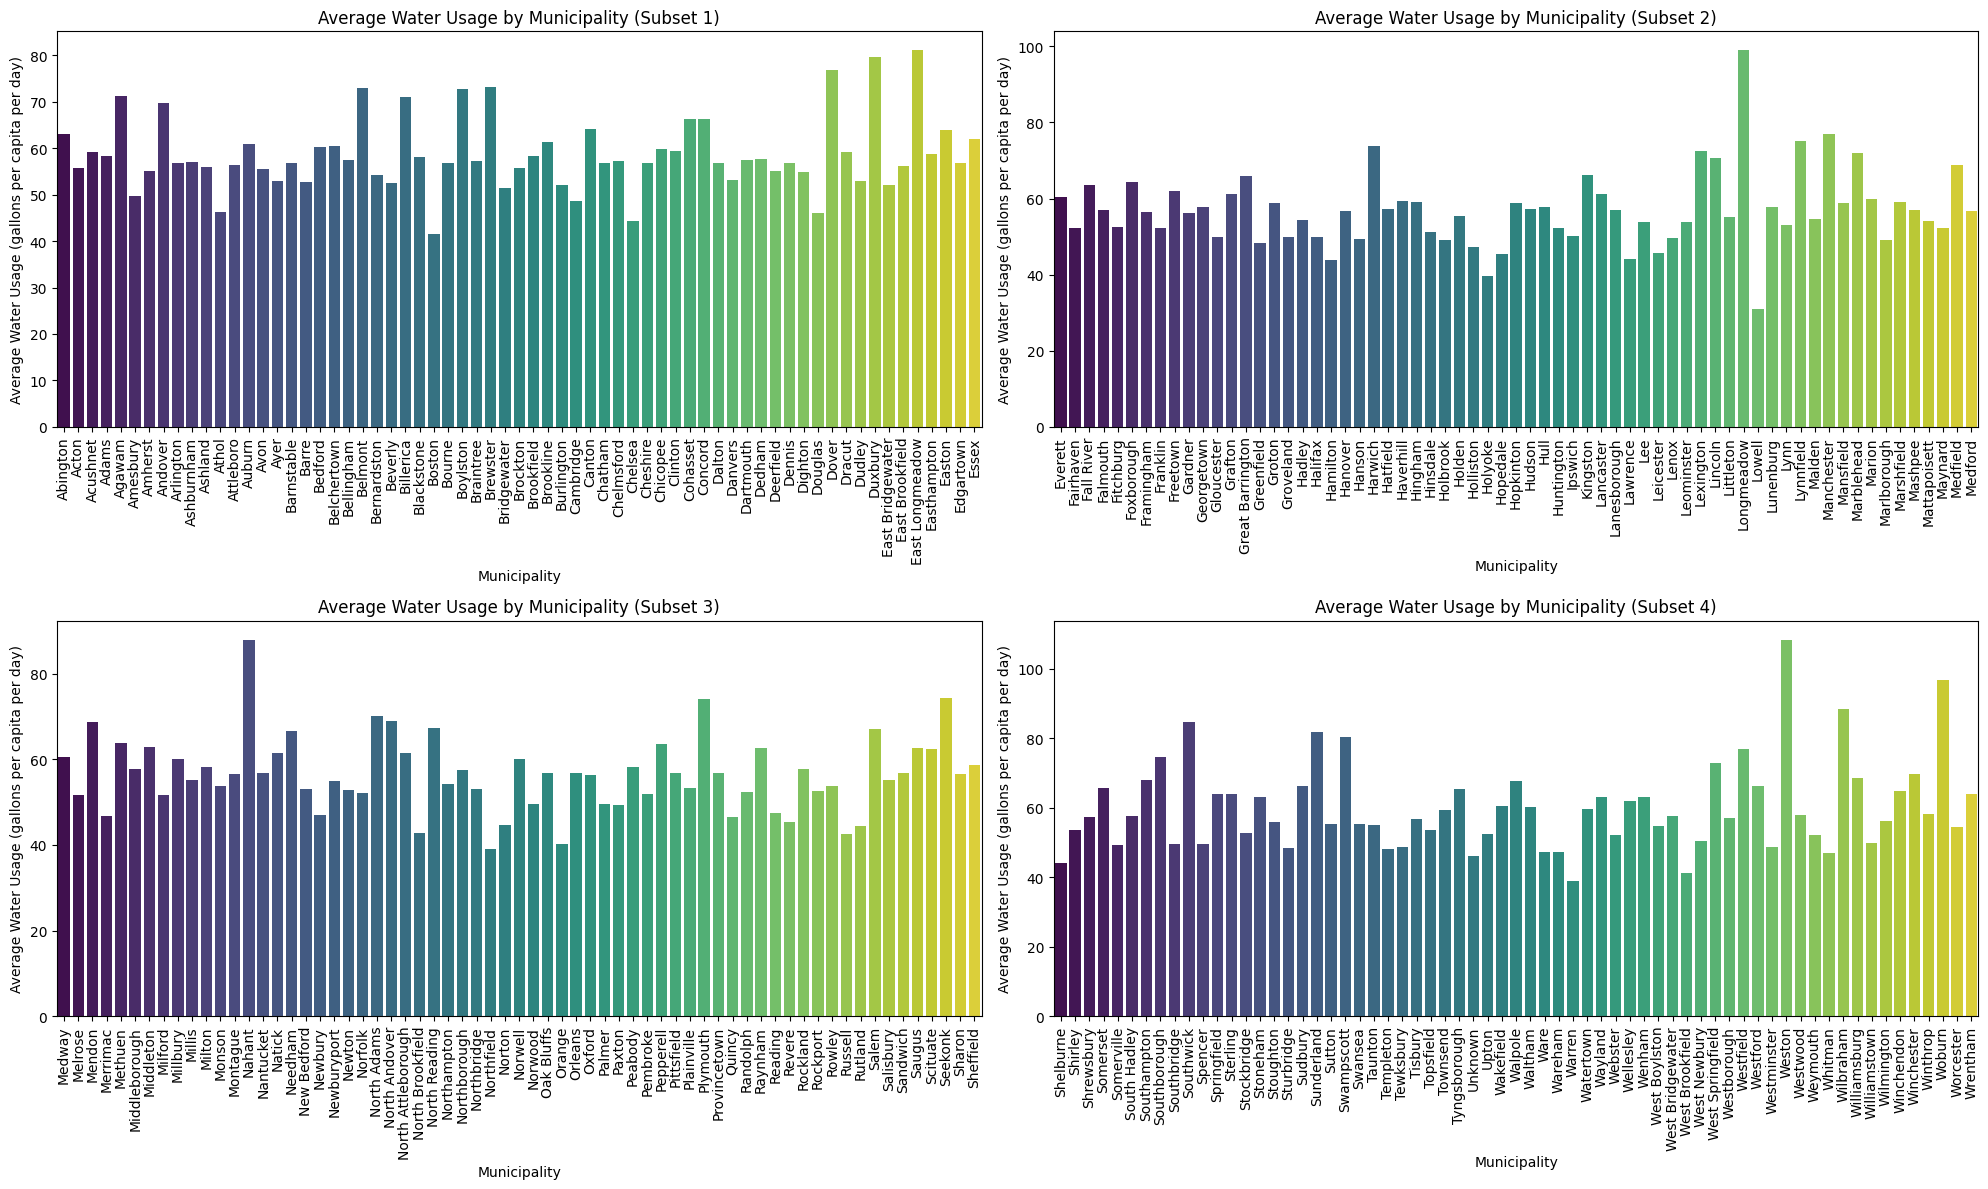

In [24]:
# Number of municipalities
num_municipalities = len(municipality_stats)

# Calculate number of subplots (in this case, 4)
num_cols = 2
num_rows = 2

# Calculate the size of each chunk (number of municipalities per subplot)
chunk_size = num_municipalities // (num_rows * num_cols)

# Create the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12))

# Flatten axes array to easily index through
axes = axes.flatten()

# Split the municipality_stats into chunks and plot each one on a different subplot
for i in range(num_rows * num_cols):
    start_idx = i * chunk_size
    end_idx = (i + 1) * chunk_size if (i + 1) * chunk_size < num_municipalities else num_municipalities

    # Get the subset of municipality_stats for the current subplot
    subset = municipality_stats.iloc[start_idx:end_idx]

    # Plot the bar plot for the subset of municipalities
    sns.barplot(x='municipal', y='average_usage', data=subset, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Average Water Usage by Municipality (Subset {i + 1})')
    axes[i].set_xlabel('Municipality')
    axes[i].set_ylabel('Average Water Usage (gallons per capita per day)')
    axes[i].tick_params(axis='x', rotation=90)

# Adjust the layout for better spacing and readability
plt.tight_layout()
plt.show()


**Box Plot - Distribution of Water Usage by Municipality**

Box plots show the spread of water usage within each municipality, highlighting outliers, medians, and interquartile ranges.

When we have many municipalities on the x-axis, it's common to face issues with label overlap and readability. To handle this, we can split the plot into multiple subplots (or grids) where each subplot displays a portion of the municipalities, allowing for better spacing and readability of the x-axis labels.

<ipython-input-25-1abdd295d678>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='municipal', y='Water_Usage', data=subset_data, palette='muted', ax=axes[i])
<ipython-input-25-1abdd295d678>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='municipal', y='Water_Usage', data=subset_data, palette='muted', ax=axes[i])
<ipython-input-25-1abdd295d678>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='municipal', y='Water_Usage', data=subset_data, palette='muted', ax=axes[i])
<ipython-input-25-1abdd295d678>:28: FutureWarning: 

Passing `pa

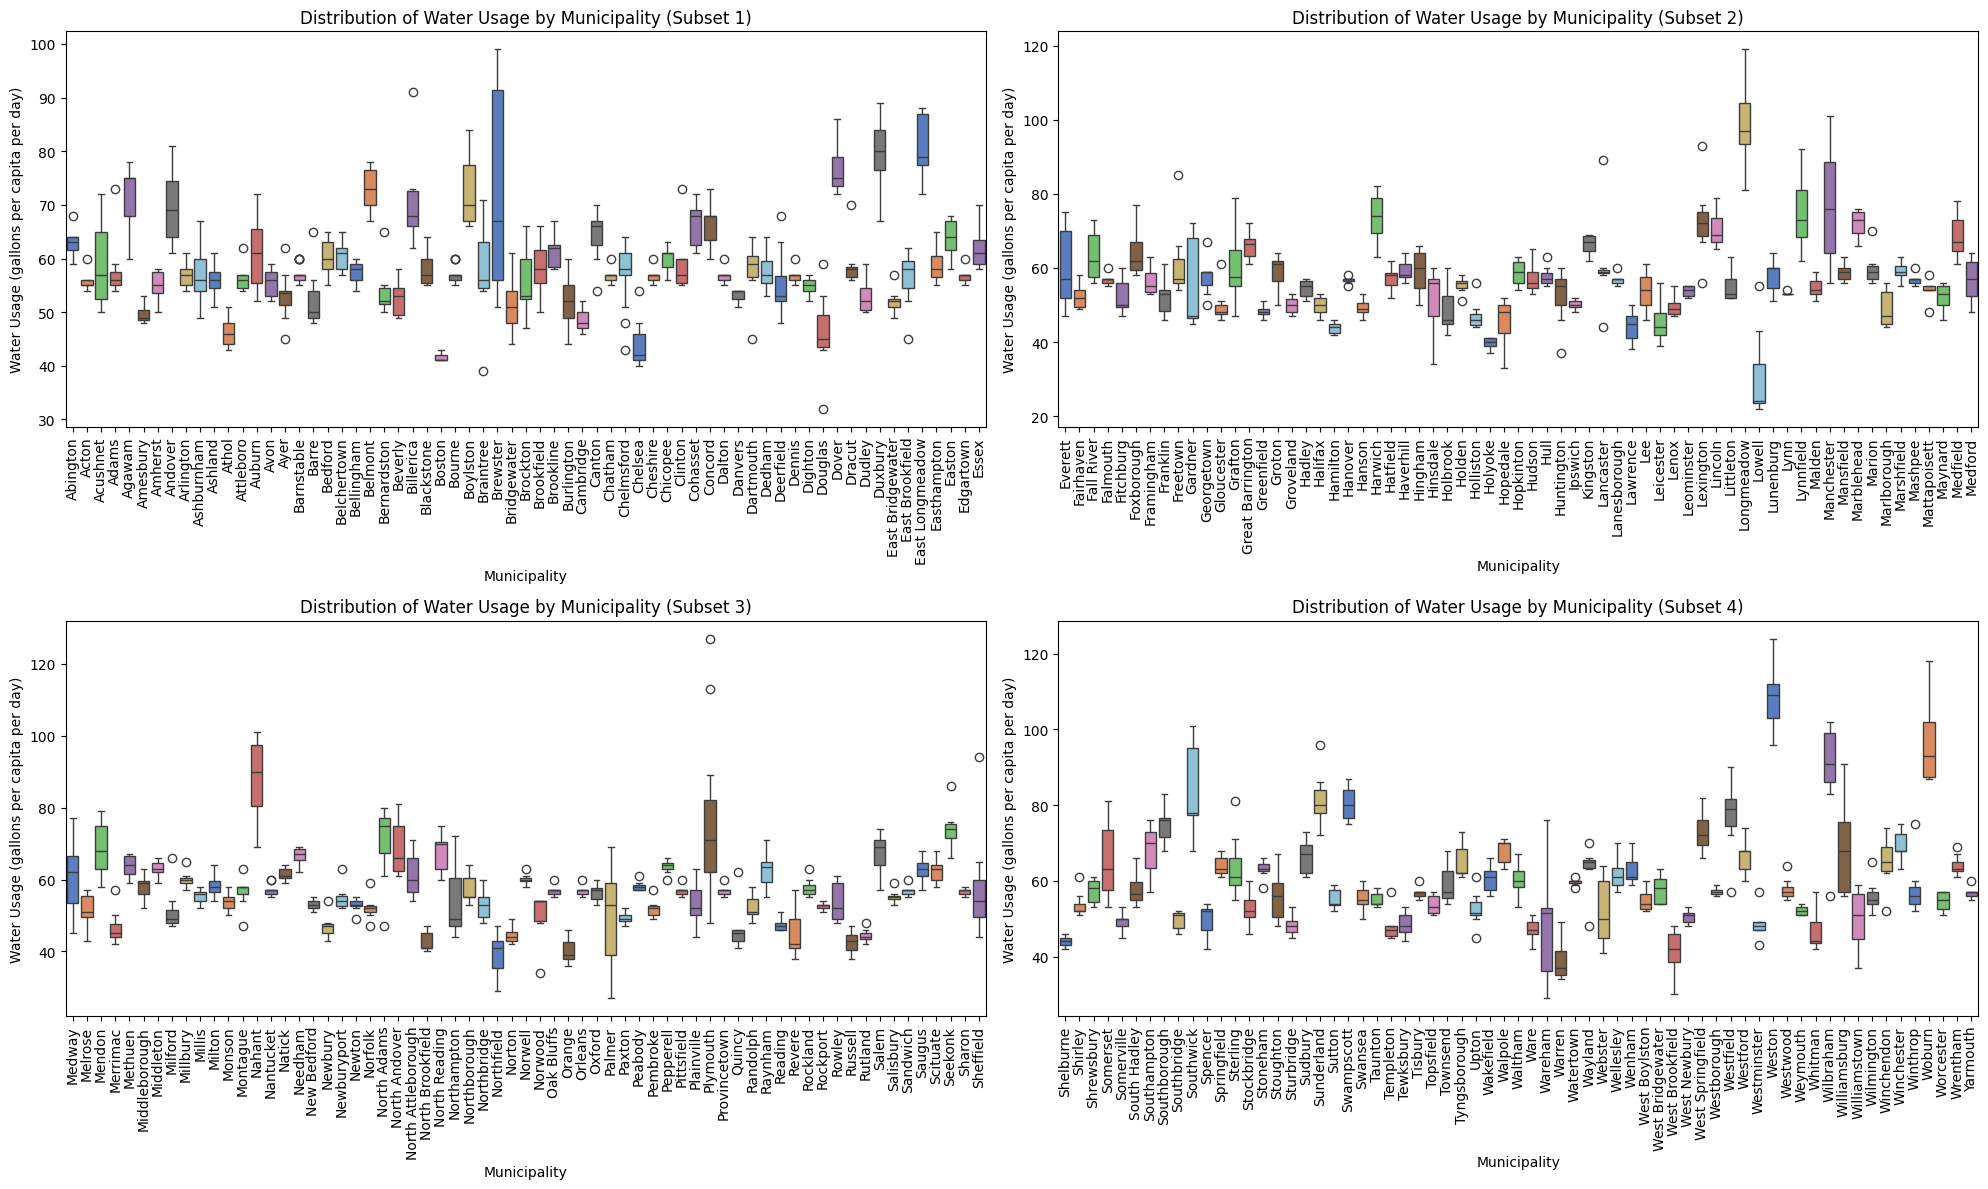

In [25]:
# Number of municipalities
num_municipalities = len(melted_df['municipal'].unique())

# Calculate number of subplots (in this case, 4)
num_cols = 2
num_rows = 2

# Calculate the size of each chunk (number of municipalities per subplot)
municipality_list = melted_df['municipal'].unique()
chunk_size = len(municipality_list) // (num_rows * num_cols)

# Create the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12))

# Flatten axes array to easily index through
axes = axes.flatten()

# Split the municipality list into chunks and plot each one on a different subplot
for i in range(num_rows * num_cols):
    start_idx = i * chunk_size
    end_idx = (i + 1) * chunk_size if (i + 1) * chunk_size < len(municipality_list) else len(municipality_list)

    # Get the subset of data for the current subplot
    subset_municipalities = municipality_list[start_idx:end_idx]
    subset_data = melted_df[melted_df['municipal'].isin(subset_municipalities)]

    # Plot the boxplot for the subset of municipalities
    sns.boxplot(x='municipal', y='Water_Usage', data=subset_data, palette='muted', ax=axes[i])
    axes[i].set_title(f'Distribution of Water Usage by Municipality (Subset {i + 1})')
    axes[i].set_xlabel('Municipality')
    axes[i].set_ylabel('Water Usage (gallons per capita per day)')
    axes[i].tick_params(axis='x', rotation=90)

# Adjust the layout for better spacing and readability
plt.tight_layout()
plt.show()


**Line Plot - Total Water Usage Over Time**

Line Plot for Water Usage Trends Over Time, here we plot the total water usage by year across all municipalities to observe trends over time.

yearly_data = Year, annual_average, total_water_usage

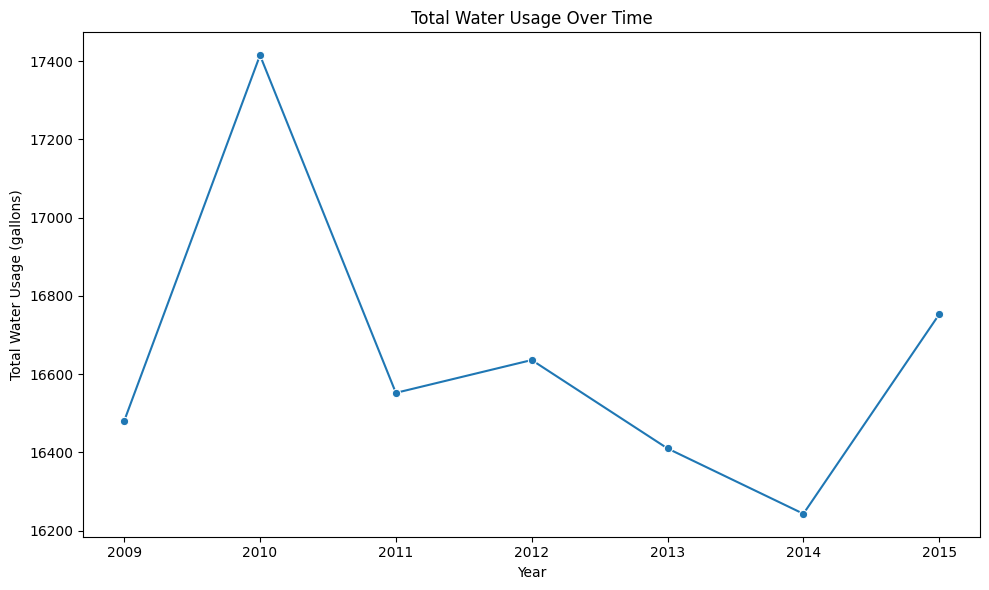

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_data, x='Year', y='total_water_usage', marker='o')
plt.title('Total Water Usage Over Time')
plt.xlabel('Year')
plt.ylabel('Total Water Usage (gallons)')
plt.tight_layout()
plt.show()


**Bar Plot for Average Water Usage by Year**

This shows us how the average water usage changes year-over-year.

<ipython-input-27-0af40d3249b9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='annual_average', data=yearly_data, palette='coolwarm')


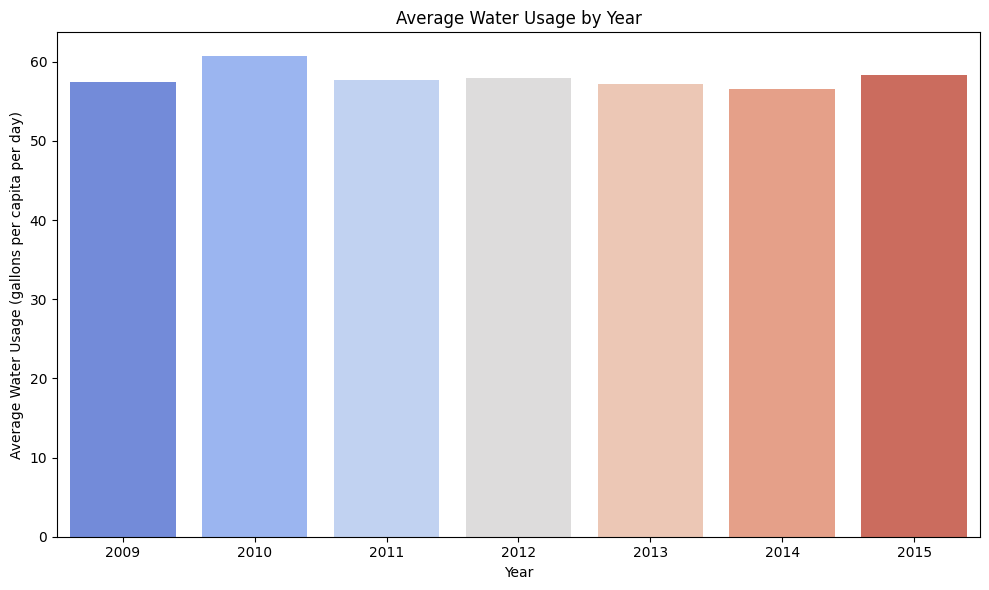

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='annual_average', data=yearly_data, palette='coolwarm')
plt.title('Average Water Usage by Year')
plt.xlabel('Year')
plt.ylabel('Average Water Usage (gallons per capita per day)')
plt.tight_layout()
plt.show()


**Above/Below Benchmark Water Usage**

Pie Chart for Proportion of Municipalities Above and Below Benchmark
This will help us visualize how many municipalities meet or exceed the state benchmark (65 gallons per capita per day).

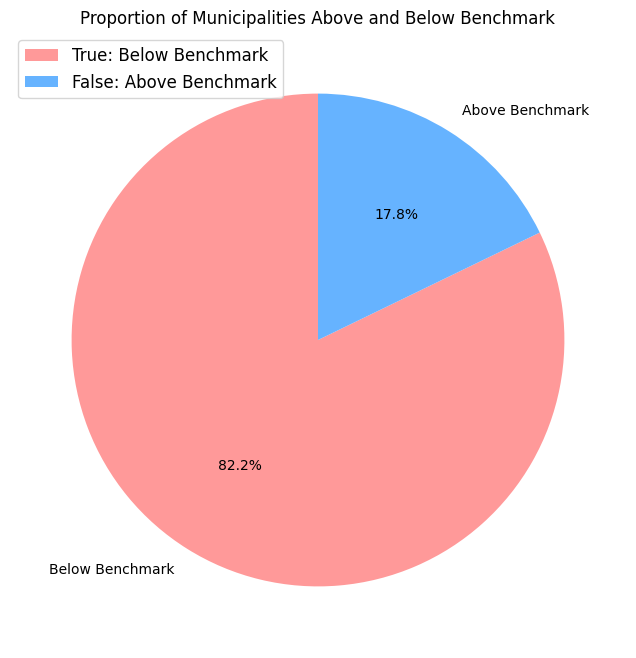

In [35]:
# Calculate the counts of 'True' and 'False' values in the 'Above_Benchmark' column
above_benchmark = melted_df['Above_Benchmark'].value_counts()

# Define labels for the pie chart segments
labels = ['Below Benchmark', 'Above Benchmark']

# Define colors for each segment
colors = ['#ff9999', '#66b3ff']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(above_benchmark, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)

# Add the title
plt.title('Proportion of Municipalities Above and Below Benchmark')

# Add a legend to describe True and False
plt.legend(labels=['True: Below Benchmark', 'False: Above Benchmark'], loc='upper left', fontsize=12)

# Display the chart
plt.show()


**Bar Plot - Percentage of Municipalities Above and Below Benchmark by Year**

This could be useful for us to observe trends over the years.

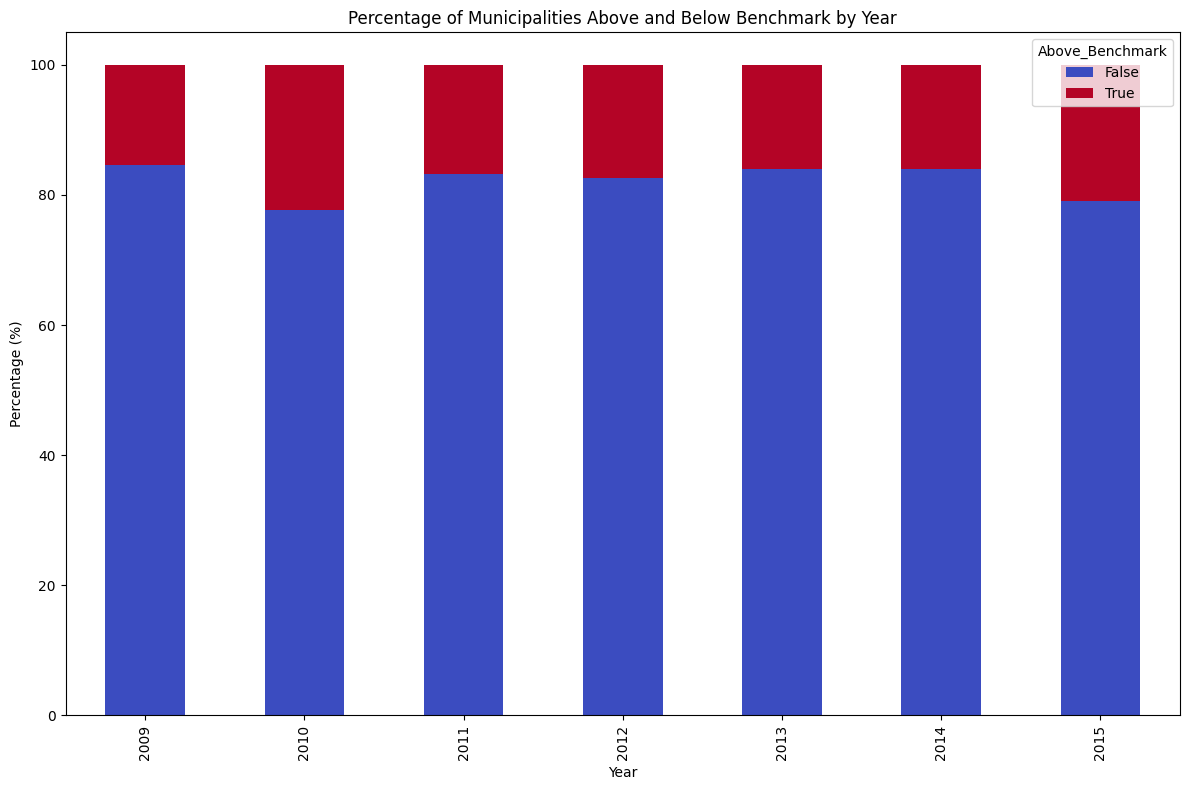

In [37]:
benchmark_by_year = melted_df.groupby(['Year', 'Above_Benchmark']).size().unstack().fillna(0)
benchmark_by_year_percentage = benchmark_by_year.div(benchmark_by_year.sum(axis=1), axis=0) * 100

benchmark_by_year_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title('Percentage of Municipalities Above and Below Benchmark by Year')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.tight_layout()
plt.show()


**Time Series of Water Usage**

Time Series Plot for Specific Municipalities
If you're interested in tracking specific municipalities over time, you can plot a line for each municipality's water usage trend.

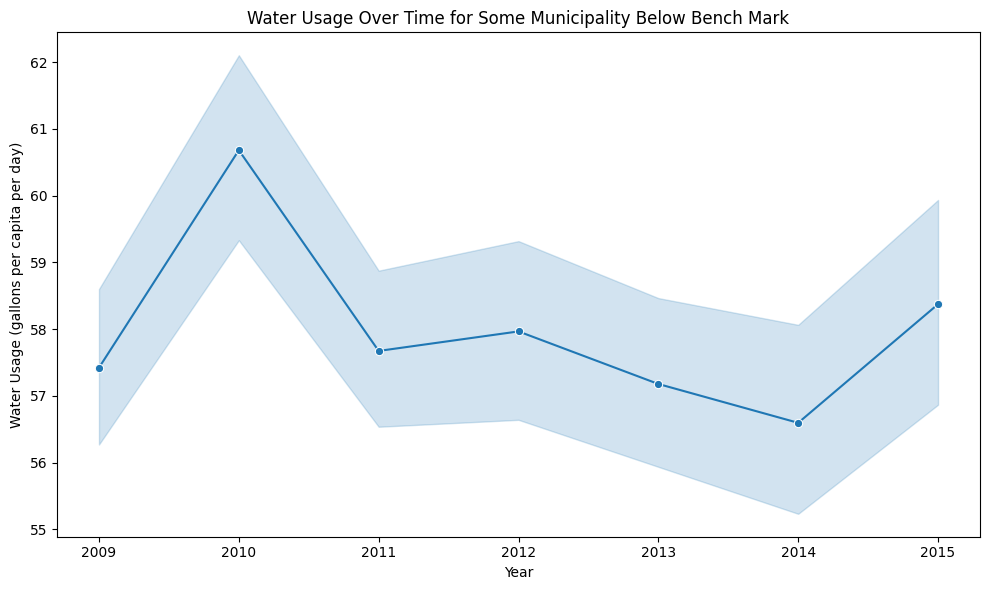

In [30]:
specific_municipality_data = melted_df[melted_df['municipal'] == 'Abington']
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Water_Usage', data=melted_df, marker='o')
plt.title('Water Usage Over Time for Some Municipality Below Bench Mark')
plt.xlabel('Year')
plt.ylabel('Water Usage (gallons per capita per day)')
plt.tight_layout()
plt.show()


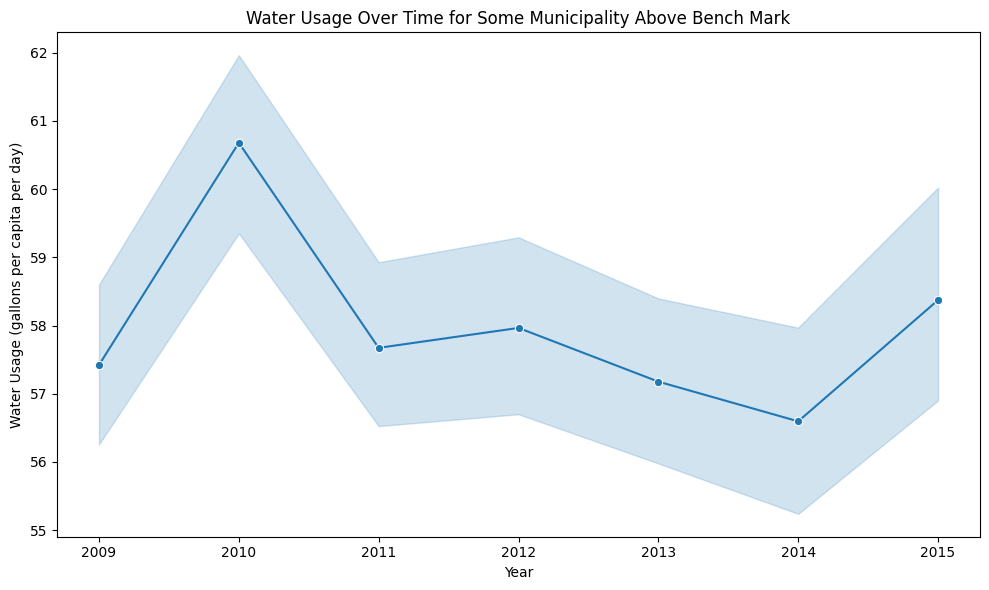

In [31]:
specific_municipality_data = melted_df[melted_df['municipal'] == 'Weston']
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Water_Usage', data=melted_df, marker='o')
plt.title('Water Usage Over Time for Some Municipality Above Bench Mark')
plt.xlabel('Year')
plt.ylabel('Water Usage (gallons per capita per day)')
plt.tight_layout()
plt.show()


**Box_Plot - Oulier Detection**

We created a boxplot for each year from 2009 to 2015, showing the distribution of water usage and highlighting the outliers based on the Lower Bound and Upper Bound.

   muni_id municipal    pwsid                            pws_name  Year  \
0        1  Abington  4001000  Abington & Rockland Jt Water Works  2009   
1        2     Acton  2002000                Acton Water District  2009   
2        3  Acushnet  4003000           Acushnet Water Department  2009   
3        4     Adams  1004000                 Adams Fire District  2009   
4        5    Agawam  1005000             Agawam Water Department  2009   

   Water_Usage  Above_Benchmark  Lower Bound  Upper Bound  
0         61.0            False         38.5         74.5  
1         55.0            False         38.5         74.5  
2         53.0            False         38.5         74.5  
3         56.0            False         38.5         74.5  
4         60.0            False         38.5         74.5  


<ipython-input-32-e15696900b96>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data, x='Year', y='Water_Usage', palette='Set2')


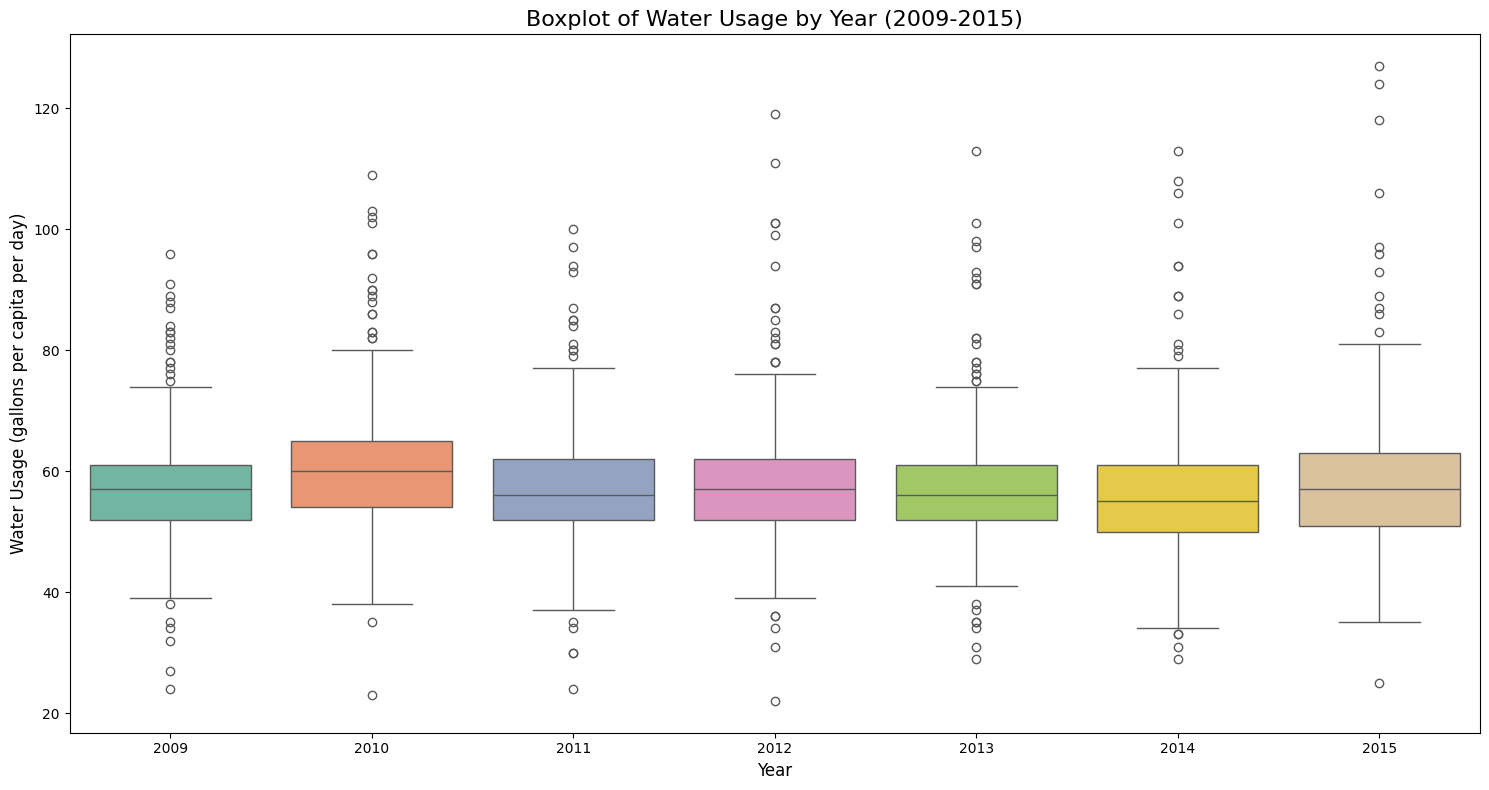

In [32]:
# Convert 'Year' to int64 in both DataFrames
melted_df['Year'] = melted_df['Year'].astype(int)
outlier_df['Year'] = outlier_df['Year'].astype(int)

# Now merge the DataFrames
merged_data = pd.merge(melted_df, outlier_df[['Year', 'Lower Bound', 'Upper Bound']],
                       on='Year', how='left')


# Assuming melted_df and outlier_df are already available
# Filter the melted_df for the years 2009-2015
melted_df = melted_df[melted_df['Year'].between(2009, 2015)]

# Merge the outlier statistics with the filtered data on the 'Year'
merged_data = pd.merge(melted_df, outlier_df[['Year', 'Lower Bound', 'Upper Bound']],
                       on='Year', how='left')

# Check the merged data (for debugging)
print(merged_data.head())

# Create a boxplot for water usage, colored by year
plt.figure(figsize=(15, 8))
sns.boxplot(data=merged_data, x='Year', y='Water_Usage', palette='Set2')

# Title and labels
plt.title('Boxplot of Water Usage by Year (2009-2015)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Water Usage (gallons per capita per day)', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


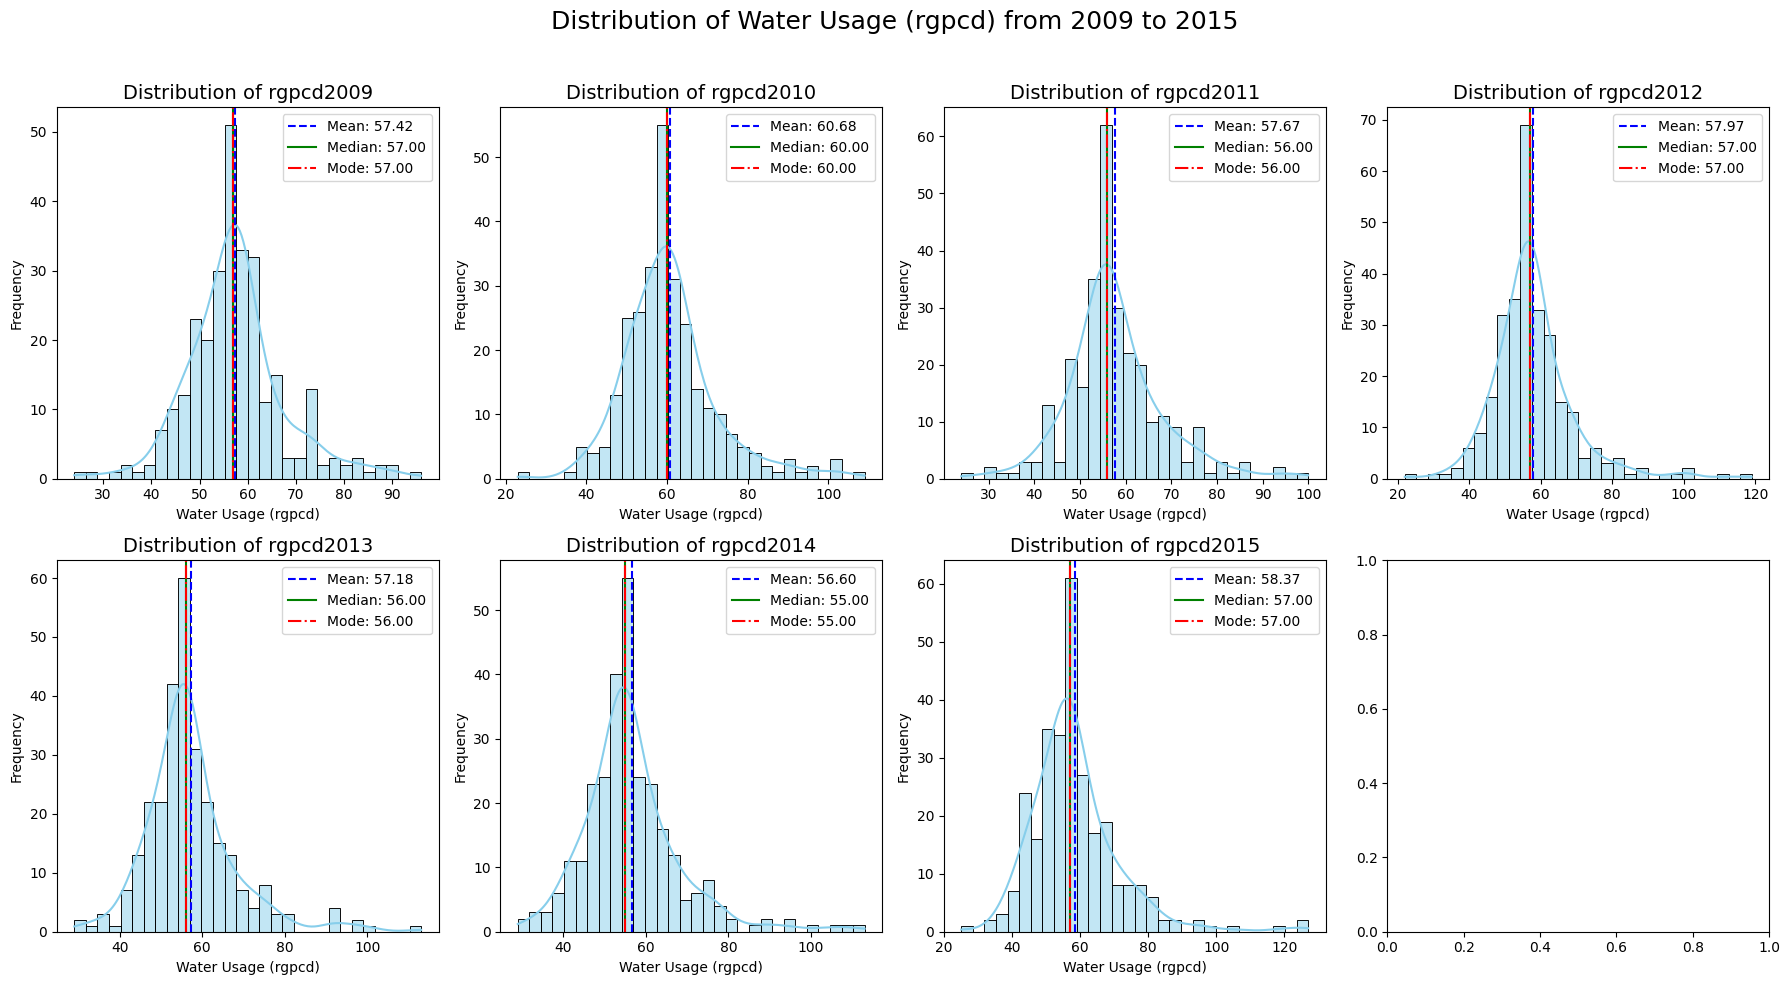

In [33]:
# THIS ONE WILL SHOW DISTRIBUTION CURVE 2009-2015

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# List of columns for the years 2009 to 2015
columns_to_plot = [f'rgpcd{year}' for year in range(2009, 2016)]

# Create subplots for each year
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
axes = axes.flatten()

# Iterate over the columns and plot each histogram
for i, column in enumerate(columns_to_plot):
    if column in df.columns:
        data = df[column].dropna()  # Drop NaN values

        # Calculate mean, median, and mode
        mean = np.mean(data)
        median = np.median(data)
        mode = pd.Series(data).mode().values[0] if not pd.Series(data).mode().empty else np.nan

        # Plot histogram with KDE
        sns.histplot(data, bins=30, kde=True, ax=axes[i], color='skyblue')

        # Annotate mean, median, and mode
        axes[i].axvline(mean, color='blue', linestyle='--', linewidth=1.5, label=f'Mean: {mean:.2f}')
        axes[i].axvline(median, color='green', linestyle='-', linewidth=1.5, label=f'Median: {median:.2f}')
        axes[i].axvline(mode, color='red', linestyle='-.', linewidth=1.5, label=f'Mode: {mode:.2f}')

        # Set title and labels
        axes[i].set_title(f"Distribution of {column}", fontsize=14)
        axes[i].set_xlabel("Water Usage (rgpcd)")
        axes[i].set_ylabel("Frequency")

        # Add legend
        axes[i].legend(fontsize=10)
    else:
        axes[i].set_visible(False)  # Hide unused subplot if column is missing

# Adjust layout
plt.suptitle("Distribution of Water Usage (rgpcd) from 2009 to 2015", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Scatter Plot - Visualizing the Regression Coefficient for All Municipalities or Water Supplies**

Here we summarize how the regression line (slope) changes for each municipality or water supply. This plot helps us understand which municipalities have positive or negative trends in water usage. Positive slopes indicate increasing water usage, while negative slopes suggest decreasing usage.

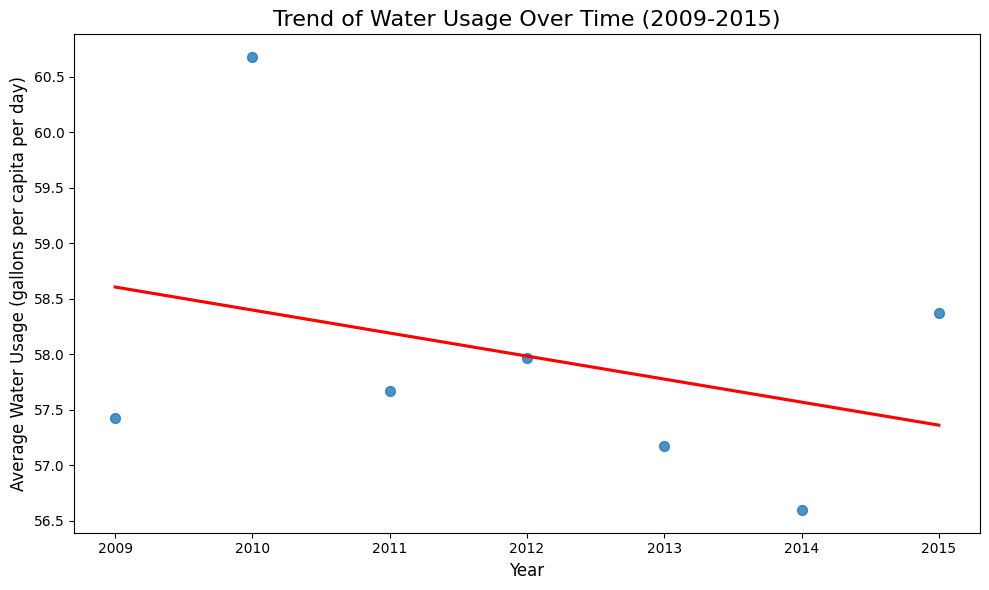

In [34]:
# Aggregate water usage by year (mean water usage across all municipalities)
annual_avg_water_usage = melted_df.groupby('Year')['Water_Usage'].mean().reset_index()

# Plot the trend with a scatter plot and a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Year', y='Water_Usage', data=annual_avg_water_usage, scatter_kws={'s': 50}, line_kws={'color': 'red'}, ci=None)

# Add titles and labels
plt.title('Trend of Water Usage Over Time (2009-2015)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Water Usage (gallons per capita per day)', fontsize=12)

plt.tight_layout()
plt.show()
